In [9]:
import pandas as pd
import numpy as np

DATA_PATH = "/kaggle/input/stock-dataset/AAPL_stock_data.csv"

df = pd.read_csv(DATA_PATH)

# PRINT columns to confirm
print(df.columns)

# FORCE first column to datetime
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors="coerce")

# Set as index
df.set_index(df.columns[0], inplace=True)

# Drop any rows where date conversion failed
df = df[~df.index.isna()]

# Sort index
df.sort_index(inplace=True)

# HARD CHECK
print(type(df.index))
df.info()


Index(['Price', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    2515 non-null   object
 1   High    2515 non-null   object
 2   Low     2515 non-null   object
 3   Close   2515 non-null   object
 4   Volume  2515 non-null   object
dtypes: object(5)
memory usage: 117.9+ KB


/tmp/ipykernel_47/3050395024.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors="coerce")


In [10]:
# Drop unnecessary column if present
if "Price" in df.columns:
    df.drop(columns=["Price"], inplace=True)

# Convert ALL columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where conversion failed
df.dropna(inplace=True)

# Final verification
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2515 non-null   float64
 1   High    2515 non-null   float64
 2   Low     2515 non-null   float64
 3   Close   2515 non-null   float64
 4   Volume  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [11]:
wf_results = walk_forward_analysis(df)
wf_results


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Train_Start,Train_End,Test_End,Test_Return
0,2015-01-02,2018-01-02,2019-01-02,0.010501
1,2016-01-02,2019-01-02,2020-01-02,0.516612
2,2017-01-02,2020-01-02,2021-01-02,0.687864
3,2018-01-02,2021-01-02,2022-01-02,0.241058
4,2019-01-02,2022-01-02,2023-01-02,-0.071343
5,2020-01-02,2023-01-02,2024-01-02,0.132960


In [12]:
def backtest_sma(df, fast=10, slow=50):
    price = df["Close"]

    df = df.copy()
    df["SMA_FAST"] = price.rolling(fast).mean()
    df["SMA_SLOW"] = price.rolling(slow).mean()

    signal = (df["SMA_FAST"] > df["SMA_SLOW"]).fillna(False).astype(int)
    position = signal.shift(1).fillna(0)

    returns = price.pct_change().fillna(0)
    strat_returns = position * returns
    equity = (1 + strat_returns).cumprod()

    return strat_returns, equity


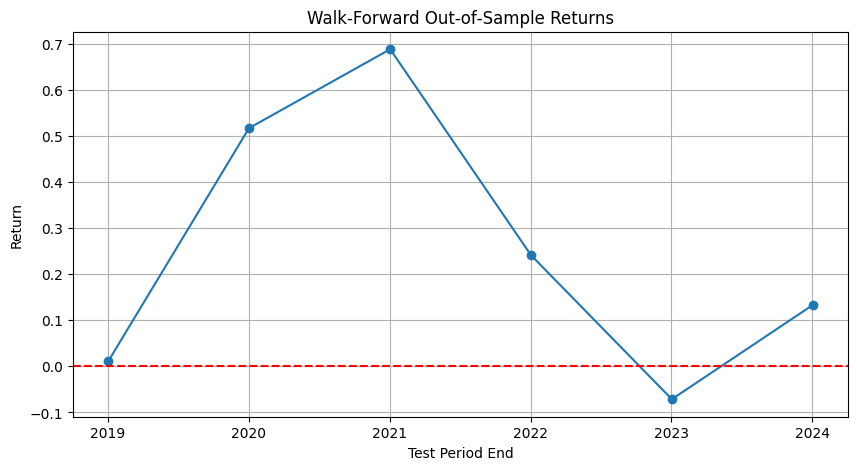

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(wf_results["Test_End"], wf_results["Test_Return"], marker="o")
plt.axhline(0, color="red", linestyle="--")
plt.title("Walk‑Forward Out‑of‑Sample Returns")
plt.xlabel("Test Period End")
plt.ylabel("Return")
plt.grid()
plt.show()


In [14]:
# Save walk-forward results for dashboard
wf_results.to_csv("/kaggle/working/walk_forward_results.csv", index=False)

# Save full equity curve
_, equity_full = backtest_sma(df)
equity_full.to_csv("/kaggle/working/equity_curve.csv")

print("Dashboard data saved.")


Dashboard data saved.


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
